In [1]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model 
from sklearn.cross_validation import train_test_split



//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('allnfllines.csv', header = 1)
df

,Road v Home,Date,Road Open Spread,Road Close Spread,Open Result,Home Open Spread,Home Close Spread,Close Result
0,CAR 20 @ DEN 21,9/8/16,1,-3,PUSH,-1,3,DEN
1,BUF 7 @ BAL 13,9/11/16,2.5,3,BAL,-2.5,-3,BAL
2,GB 27 @ JAC 23,9/11/16,-4,-3.5,PUSH,4,3.5,GB
3,SD 27 @ KC 33,9/11/16,7,6.5,SD,-7,-6.5,SD
4,OAK 35 @ NO 34,9/11/16,1,2.5,OAK,-1,-2.5,OAK
5,CHI 14 @ HOU 23,9/11/16,5.5,5.5,HOU,-5.5,-5.5,HOU
6,CLE 10 @ PHI 29,9/11/16,7,3.5,PHI,-7,-3.5,PHI
7,MIN 25 @ TEN 16,9/11/16,-3,-2.5,MIN,3,2.5,MIN
8,TB 31 @ ATL 24,9/11/16,3,2.5,TB,-3,-2.5,TB
9,CIN 23 @ NYJ 22,9/11/16,0,1,CIN,0,-1,CIN


In [3]:
list(df.columns)

['Road v Home',
 'Date',
 'Road Open Spread',
 'Road Close Spread',
 'Open Result',
 'Home Open Spread',
 'Home Close Spread',
 'Close Result']

In [4]:
df = df[['Road v Home','Home Open Spread','Home Close Spread', 'Date']]
df.head()

,Road v Home,Home Open Spread,Home Close Spread,Date
0,CAR 20 @ DEN 21,-1,3,9/8/16
1,BUF 7 @ BAL 13,-2.5,-3,9/11/16
2,GB 27 @ JAC 23,4,3.5,9/11/16
3,SD 27 @ KC 33,-7,-6.5,9/11/16
4,OAK 35 @ NO 34,-1,-2.5,9/11/16


In [5]:
df.dtypes

Road v Home          object
Home Open Spread     object
Home Close Spread    object
Date                 object
dtype: object

In [6]:
x = df['Road v Home'][0]
x

'CAR 20 @ DEN 21'

In [7]:
x2 = x.split()
x2

['CAR', '20', '@', 'DEN', '21']

In [8]:
df = df[df['Road v Home'] != 'Showing 1 to 16 of 16 entries']
df = df[df['Road v Home'] != 'Road v Home']

In [9]:
df[df['Road v Home'].isnull()].head() 

,Road v Home,Home Open Spread,Home Close Spread,Date
187,NaN,NaN,NaN,NaN
376,NaN,NaN,NaN,NaN
566,NaN,NaN,NaN,NaN
740,NaN,NaN,NaN,NaN
910,NaN,NaN,NaN,NaN


In [10]:
df = df.dropna()

In [11]:
df.reset_index(drop = True, inplace = True)

In [12]:
home = []
road = []
home_score = []
road_score = []

for i in range(len(df)):
    matchup = df['Road v Home'][i]
    x = matchup.split()
    road.append(x[0])
    road_score.append(x[1])
    home.append(x[3])
    home_score.append(x[4])
    
df['home'] = home
df['road'] = road
df['home_score'] = home_score
df['road_score'] = road_score

In [13]:
df.head()

,Road v Home,Home Open Spread,Home Close Spread,Date,home,road,home_score,road_score
0,CAR 20 @ DEN 21,-1,3,9/8/16,DEN,CAR,21,20
1,BUF 7 @ BAL 13,-2.5,-3,9/11/16,BAL,BUF,13,7
2,GB 27 @ JAC 23,4,3.5,9/11/16,JAC,GB,23,27
3,SD 27 @ KC 33,-7,-6.5,9/11/16,KC,SD,33,27
4,OAK 35 @ NO 34,-1,-2.5,9/11/16,NO,OAK,34,35


In [14]:
try:
    del df['Road v Home']
except:
    pass

In [15]:
df['home'][df['home'] == 'LA'] = 'STL'

In [16]:
df['road'][df['road'] == 'LA'] = 'STL'

In [17]:
df['Home Open Spread'] = df['Home Open Spread'].apply(lambda x: float(x))
df['Home Close Spread'] = df['Home Close Spread'].apply(lambda x: float(x))
df['home_score'] = df['home_score'].apply(lambda x: float(x))
df['road_score'] = df['road_score'].apply(lambda x: float(x))

In [18]:
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x))
df['day_of_week'] = df['Date'].apply(lambda x: str(x.dayofweek))
df['month'] = df['Date'].apply(lambda x: str(x.month))

In [19]:
df['adjusted_home_score'] = df['home_score'] + df['Home Open Spread']

In [20]:
def winner(row):
    if row['adjusted_home_score'] > row['road_score']:
        return 'home'
    elif row['adjusted_home_score'] < row['road_score']:
        return 'away'
    else:
        return 'push'
        

In [21]:
df['winner'] = df.apply(winner, axis=1)

In [22]:
def cover(row):
    if (row['winner'] == 'home')& (row['Home Close Spread'] > 0):
        return 1
    elif (row['winner'] == 'away')& (row['Home Close Spread'] < 0):
        return 1
    else:
        return 0

In [23]:
df['cover'] = df.apply(cover, axis=1)

In [24]:
df.head()

,Home Open Spread,Home Close Spread,Date,home,road,home_score,road_score,day_of_week,month,adjusted_home_score,winner,cover
0,-1.0,3.0,2016-09-08,DEN,CAR,21.0,20.0,3,9,20.0,push,0
1,-2.5,-3.0,2016-09-11,BAL,BUF,13.0,7.0,6,9,10.5,home,0
2,4.0,3.5,2016-09-11,JAC,GB,23.0,27.0,6,9,27.0,push,0
3,-7.0,-6.5,2016-09-11,KC,SD,33.0,27.0,6,9,26.0,away,1
4,-1.0,-2.5,2016-09-11,NO,OAK,34.0,35.0,6,9,33.0,away,1


# EDA

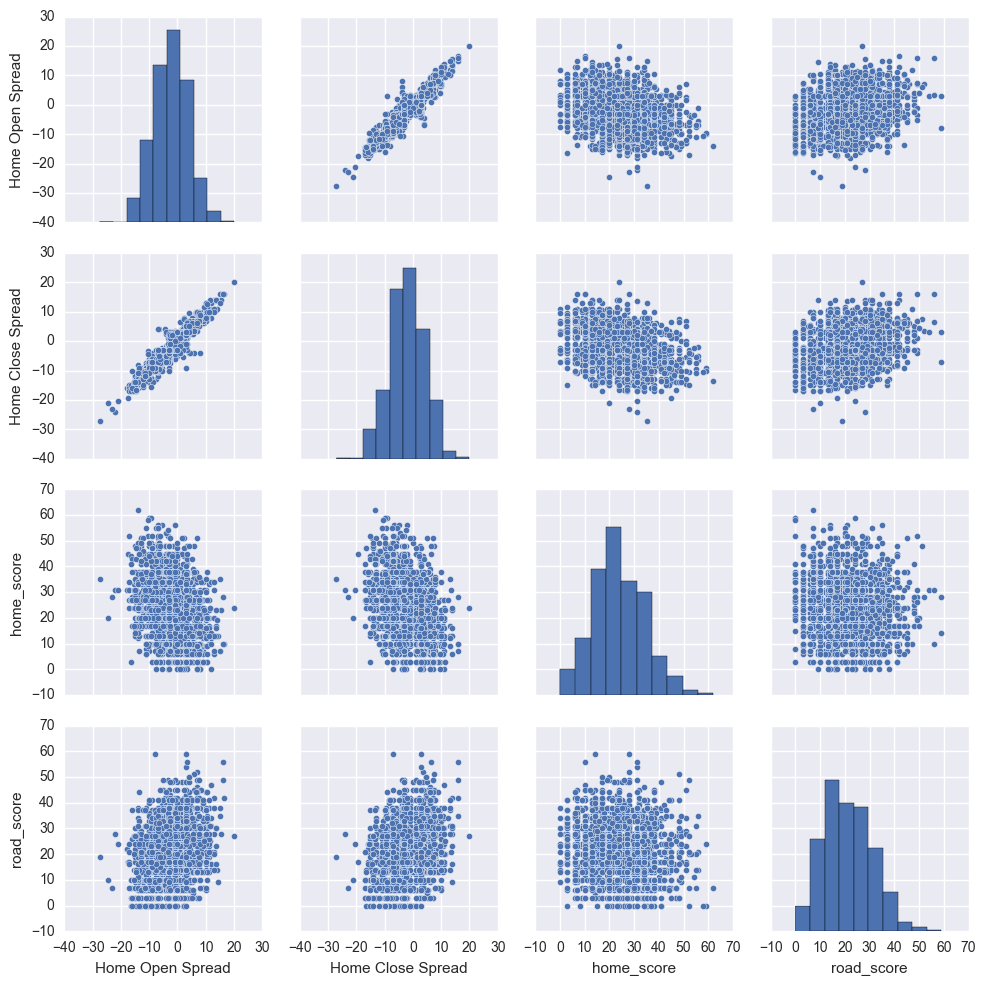

In [25]:
sns.pairplot(df[['Home Open Spread', 'Home Close Spread', 'home_score', 'road_score']])


In [26]:
def rand_jitter(arr):
    stdev = .005*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

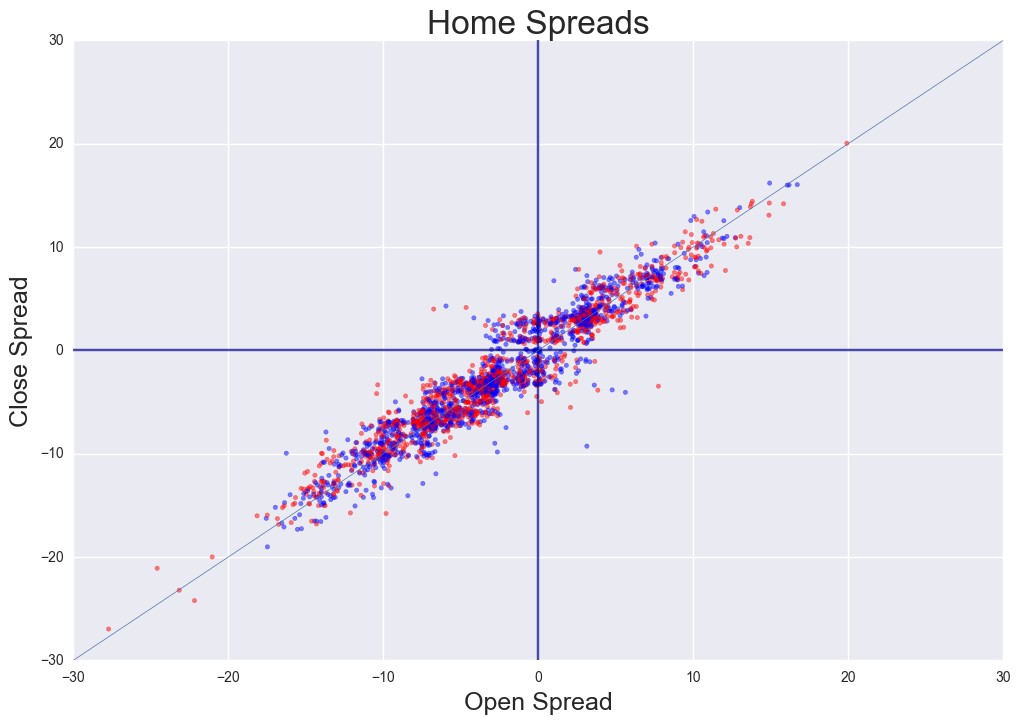

In [27]:
plt.figure(figsize=(12,8))

color_dict = {
    0 : 'blue',
    1 : 'red'}

df['cover_color'] = df['cover'].apply(lambda x: color_dict[x])
    
plt.scatter(rand_jitter(df['Home Open Spread']), rand_jitter(df['Home Close Spread']), alpha = 0.5, s = 10, \
            color = df['cover_color'])
plt.title('Home Spreads', fontsize = 24)
plt.axhline(0, color='darkblue', alpha = 0.7)
plt.axvline(0, color='darkblue', alpha = 0.7)
plt.plot([-30,30],[-30,30], linewidth = .5)
# y label
plt.ylabel('Close Spread', fontsize = 18)
#plt.yticks(np.arange(8.0, 9.5, 0.1), fontsize = 12)
# x label
plt.xlabel('Open Spread', fontsize = 18)
#plt.xticks(np.arange(0.0, 1.81, 0.1), fontsize = 12)
# set the figure boundaries
plt.xlim([-30, 30])
plt.ylim([-30, 30])
plt.grid(True)
plt.show()

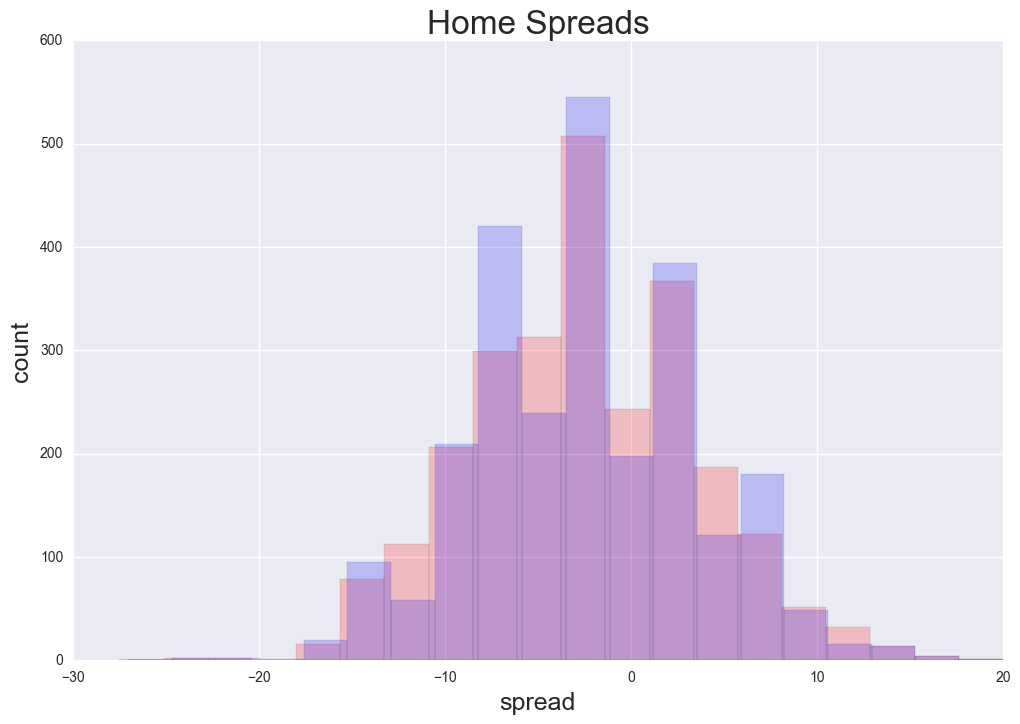

In [28]:
plt.figure(figsize=(12,8))

plt.hist(df['Home Open Spread'], alpha = 0.2, color = 'red', bins = 20)
plt.hist(df['Home Close Spread'], alpha = 0.2, color = 'blue', bins = 20)
   
plt.title('Home Spreads', fontsize = 24)
# y label
plt.ylabel('count', fontsize = 18)
#plt.yticks(np.arange(8.0, 9.5, 0.1), fontsize = 12)
# x label
plt.xlabel('spread', fontsize = 18)
#plt.xticks(np.arange(0.0, 1.81, 0.1), fontsize = 12)
# set the figure boundaries
plt.show()

In [29]:
big_dum = pd.concat([df.drop(['home'], axis = 1), \
                             pd.get_dummies(df['home'], prefix = 'home')], axis = 1)
big_dum = pd.concat([big_dum.drop(['road'], axis = 1), \
                             pd.get_dummies(big_dum['road'], prefix = 'road')], axis = 1)
big_dum = pd.concat([big_dum.drop(['month'], axis = 1), \
                             pd.get_dummies(big_dum['month'], prefix = 'month')], axis = 1)
 
                            
try:
    
    del big_dum['home_score']
    del big_dum['adjusted_home_score']
    del big_dum['Date']
    del big_dum['winner']
    del big_dum['road_score']
    del big_dum['home_ARI']
    del big_dum['road_ARI']
    
    
except:
    pass




In [30]:
big_dum.head()

,Home Open Spread,Home Close Spread,day_of_week,cover,cover_color,home_ATL,home_BAL,home_BUF,home_CAR,home_CHI,...,road_SF,road_STL,road_TB,road_TEN,road_WAS,month_1,month_10,month_11,month_12,month_9
0,-1.0,3.0,3,0,blue,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-2.5,-3.0,6,0,blue,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4.0,3.5,6,0,blue,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-7.0,-6.5,6,1,red,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.0,-2.5,6,1,red,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
big_dum['day_of_week'].value_counts()

6    2203
0     170
3     133
5      51
1       1
4       1
2       1
Name: day_of_week, dtype: int64

In [32]:
big_dum = big_dum[big_dum['day_of_week'] != 1]
big_dum = big_dum[big_dum['day_of_week'] != 4]
big_dum = big_dum[big_dum['day_of_week'] != 2]
big_dum.reset_index(drop = True, inplace = True)

In [33]:
big_dum['day_of_week'] = big_dum['day_of_week'].apply(lambda x: x.replace('6', 'Sunday'))
big_dum['day_of_week'] = big_dum['day_of_week'].apply(lambda x: x.replace('0', 'Monday'))
big_dum['day_of_week'] = big_dum['day_of_week'].apply(lambda x: x.replace('3', 'Thursday'))
big_dum['day_of_week'] = big_dum['day_of_week'].apply(lambda x: x.replace('5', 'Saturday'))

In [34]:
big_dum = pd.concat([big_dum.drop(['day_of_week'], axis = 1), \
                             pd.get_dummies(big_dum['day_of_week'])], axis = 1)
try:
    del big_dum['Sunday']
except:
    pass

In [35]:
big_dum.head(5)

,Home Open Spread,Home Close Spread,cover,cover_color,home_ATL,home_BAL,home_BUF,home_CAR,home_CHI,home_CIN,...,month_10,month_11,month_12,month_9,1,2,4,Monday,Saturday,Thursday
0,-1.0,3.0,0,blue,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-2.5,-3.0,0,blue,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,3.5,0,blue,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-7.0,-6.5,1,red,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.0,-2.5,1,red,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
try:
    del big_dum['1']
    del big_dum['2']
    del big_dum['4']
except:
    pass

In [37]:

big_dum.head(5)
pd.DataFrame(big_dum).to_csv('big_dum.csv')

In [38]:
del big_dum['cover_color']
big_dum.head()


,Home Open Spread,Home Close Spread,cover,home_ATL,home_BAL,home_BUF,home_CAR,home_CHI,home_CIN,home_CLE,...,road_TEN,road_WAS,month_1,month_10,month_11,month_12,month_9,Monday,Saturday,Thursday
0,-1.0,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-2.5,-3.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4.0,3.5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-7.0,-6.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.0,-2.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [39]:
y = big_dum['cover']
X = big_dum.drop(['cover'], axis = 1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)

In [41]:
lv = linear_model.LogisticRegression()

In [42]:
X_test

,Home Open Spread,Home Close Spread,home_ATL,home_BAL,home_BUF,home_CAR,home_CHI,home_CIN,home_CLE,home_DAL,...,road_TEN,road_WAS,month_1,month_10,month_11,month_12,month_9,Monday,Saturday,Thursday
2156,-1.0,-4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1737,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1173,-2.5,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
478,-4.5,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1356,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2385,13.0,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2425,10.5,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178,1.5,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1208,2.5,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
782,-1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
lv.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
lv.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [45]:
lv.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1,

In [46]:
y_test

2156    0
1737    0
1173    1
478     1
1356    0
2385    1
2425    1
178     0
1208    0
782     0
1174    0
1437    1
1713    0
1954    0
2073    0
1502    1
759     0
1090    0
859     0
657     1
2095    1
430     1
2059    1
1340    1
1539    0
1688    0
2475    0
1325    1
2019    0
930     0
       ..
2387    1
415     1
222     0
358     0
1441    1
937     1
8       1
1087    0
316     1
304     1
427     1
105     0
1564    1
121     0
1967    1
1653    1
867     1
1385    0
1861    0
1292    1
115     0
1037    1
744     0
862     0
2110    0
2545    0
1475    1
1309    1
672     1
2518    0
Name: cover, dtype: int64

In [47]:
lv.predict_log_proba(X_test)

array([[-0.65652305, -0.73116379],
       [-0.54733416, -0.86391159],
       [-0.67432353, -0.71233197],
       ..., 
       [-0.85354177, -0.55495831],
       [-0.62277005, -0.76885476],
       [-0.63489201, -0.75500709]])

In [48]:
lv.predict_proba(X_test)

array([[ 0.51865153,  0.48134847],
       [ 0.57848992,  0.42151008],
       [ 0.50950096,  0.49049904],
       ..., 
       [ 0.42590381,  0.57409619],
       [ 0.53645637,  0.46354363],
       [ 0.52999272,  0.47000728]])

In [49]:
lv.score(X_test, y_test)

0.49940828402366866